<a href="https://colab.research.google.com/github/remisharoon/QuantumAnalytics/blob/master/MAG8910_22_66_94_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_232"
OpenJDK Runtime Environment (build 1.8.0_232-8u232-b09-0ubuntu1~18.04.1-b09)
OpenJDK 64-Bit Server VM (build 25.232-b09, mixed mode)


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
%pylab inline
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Populating the interactive namespace from numpy and matplotlib


In [0]:
try:
  from zoo.common.nncontext import *
  sc = init_nncontext("Anomaly Detection Example")
except Exception as e:
  print(" analytics-zoo is not installed , lets install using pip")
  !pip install analytics-zoo
  from zoo.common.nncontext import *
  sc = init_nncontext("Anomaly Detection Example")

 analytics-zoo is not installed , lets install using pip
     |████████████████████████████████| 195.4MB 48kB/s 
     |████████████████████████████████| 104.0MB 105kB/s 
     |████████████████████████████████| 215.6MB 61kB/s 
     |████████████████████████████████| 204kB 54.4MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.3-py2.py3-none-any.whl size=215964963 sha256=03de14e6be7033dff673be30dd4b6a70b312a766fd23e89151149bcf5369a2e7
  Stored in directory: /root/.cache/pip/wheels/8d/20/f0/b30e2024226dc112e256930dd2cd4f06d00ab053c86278dcf3
Successfully built pyspark
Prepending /usr/local/lib/python3.6/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Adding /usr/local/lib/python3.6/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.10.0-spark_2.4.3-0.7.0-jar-with-dependencies.jar to BIGDL_JARS
Prepending /usr/local/lib/python3.6/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


In [0]:
from zoo.pipeline.api.keras.layers import Dense, Dropout, LSTM
from zoo.pipeline.api.keras.models import Sequential

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/data/Energy"

MAG8910_22_66_94_Energy.csv


In [0]:
try:
    dataset_path = "/content/drive/My Drive/data/Energy/MAG8910_22_66_94_Energy.csv"
    df = pd.read_csv(dataset_path)
except Exception as e:
    print("MAG8910_22_66_94_Energy.csv doesn't exist")

In [0]:
#Filters
df = df[df['Granularity'] == 'QuarterHour']
df = df[df['ModuleConsumedWatt'] >= 0]
df = df[df['DateTimeEpoch'] >= 1517443201000]

In [0]:
df.head()

,Name,ModuleConsumedWatt,ModuleSavedWatt,DurationHours,ClientID,EnergySavedPercent,MoneySaved,MoneyTEEs,TEEsGained,CO2Saved,TEPsSaved,TreesSaved,Wh_TEP,Wh_CO2,TEE_Cost,CostWH,LegacyEnergy,EnergyProject,is_deleted,date_deleted,ReportFieldsSetId,NodeID,NodeName,NodeType,DateTimeEpoch,Granularity,Year,Month,Day,Hour,QuarterHour,Minute,Second,EnergyConsumedPercent,LegacyPowerInstalled,CurrentPowerInstalled,EnergySavedByDynMgmtPct,EnergySavedLegacy
26611,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,0,2,0,0,NaN,10.374,3.528,NaN,0.0
26612,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,1,0,0,0,NaN,10.374,3.528,NaN,0.0
26613,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,1,2,0,0,NaN,10.374,3.528,NaN,0.0
26614,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,2,0,0,0,NaN,10.374,3.528,NaN,0.0
26615,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,2,2,0,0,NaN,10.374,3.528,NaN,0.0


In [0]:
# check the mean of passenger number 
print(df['ModuleConsumedWatt'].mean())

1.7109971077255706


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
df['datetime'] = pd.to_datetime(df['DateTimeEpoch'], unit='ms')
df['weekday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hours'] = pd.to_datetime(df['datetime']).dt.hour
df = df.sort_values(by='DateTimeEpoch')
df = df.reset_index()
df.head(2)

,index,Name,ModuleConsumedWatt,ModuleSavedWatt,DurationHours,ClientID,EnergySavedPercent,MoneySaved,MoneyTEEs,TEEsGained,CO2Saved,TEPsSaved,TreesSaved,Wh_TEP,Wh_CO2,TEE_Cost,CostWH,LegacyEnergy,EnergyProject,is_deleted,date_deleted,ReportFieldsSetId,NodeID,NodeName,NodeType,DateTimeEpoch,Granularity,Year,Month,Day,Hour,QuarterHour,Minute,Second,EnergyConsumedPercent,LegacyPowerInstalled,CurrentPowerInstalled,EnergySavedByDynMgmtPct,EnergySavedLegacy,datetime,weekday,hours
0,26611,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,0,2,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 01:53:20,3,1
1,26612,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,1,0,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 01:53:20,3,1


No handles with labels found to put in legend.


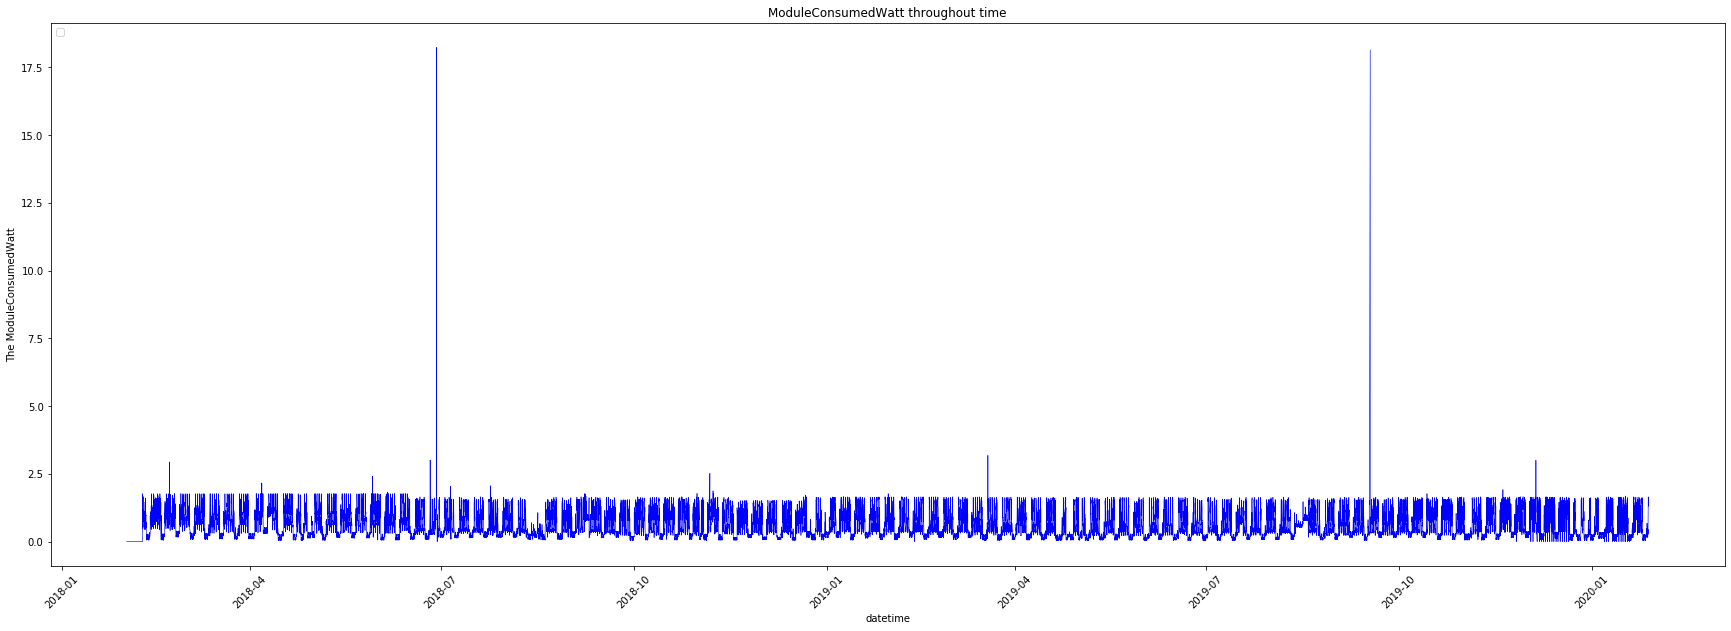

In [0]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(df['datetime'], df['ModuleConsumedWatt'], color='blue', linewidth=0.6)
ax.set_title('ModuleConsumedWatt throughout time')

plt.xlabel('datetime')
plt.xticks(rotation=45)
plt.ylabel('The ModuleConsumedWatt')
plt.legend(loc='upper left')
plt.show()

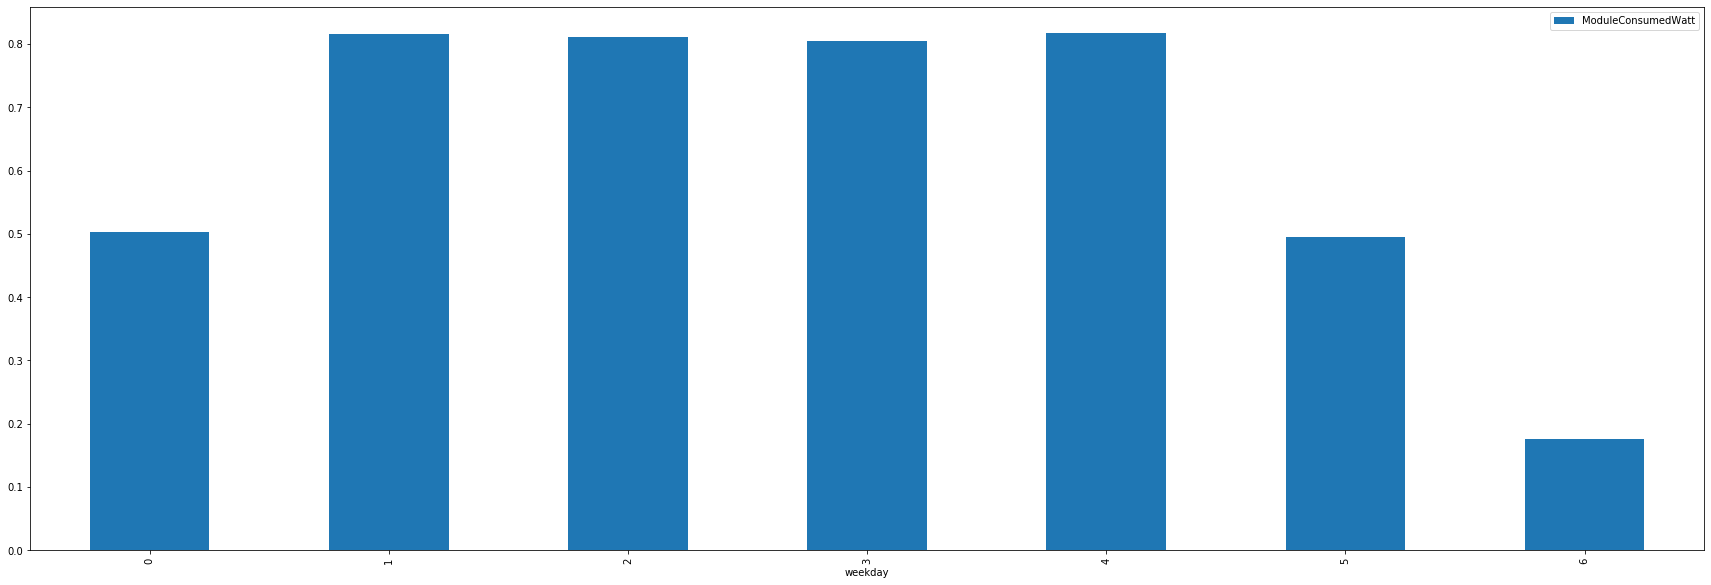

In [0]:
df.groupby('weekday')[['ModuleConsumedWatt']].mean().plot(kind='bar',figsize=(30,10))



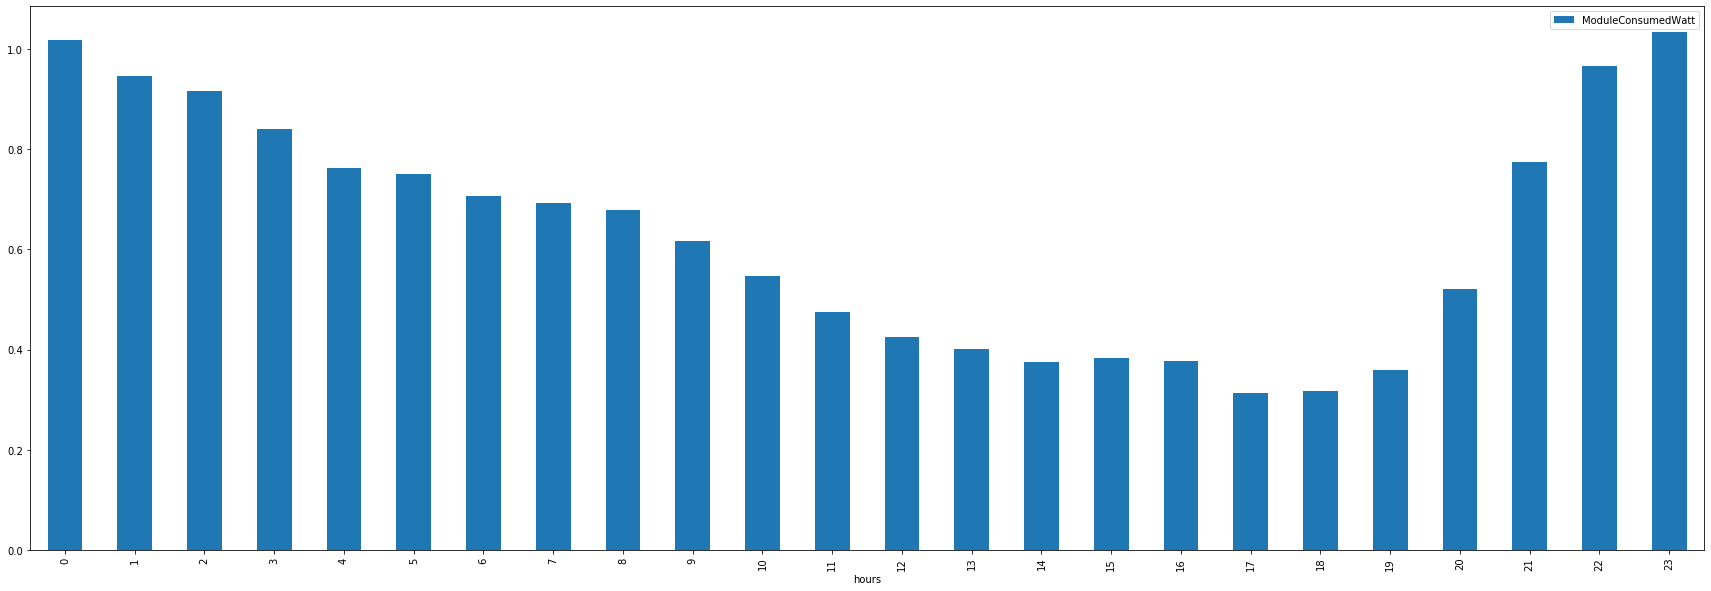

In [0]:
df.groupby('hours')[['ModuleConsumedWatt']].mean().plot(kind='bar',figsize=(30,10))


In [0]:
df.head(10)

,index,Name,ModuleConsumedWatt,ModuleSavedWatt,DurationHours,ClientID,EnergySavedPercent,MoneySaved,MoneyTEEs,TEEsGained,CO2Saved,TEPsSaved,TreesSaved,Wh_TEP,Wh_CO2,TEE_Cost,CostWH,LegacyEnergy,EnergyProject,is_deleted,date_deleted,ReportFieldsSetId,NodeID,NodeName,NodeType,DateTimeEpoch,Granularity,Year,Month,Day,Hour,QuarterHour,Minute,Second,EnergyConsumedPercent,LegacyPowerInstalled,CurrentPowerInstalled,EnergySavedByDynMgmtPct,EnergySavedLegacy,datetime,weekday,hours
0,26611,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,0,2,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 01:53:20,3,1
1,26612,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,1,0,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 01:53:20,3,1
2,26613,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,1,2,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 01:53:20,3,1
3,26614,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,2,0,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 01:53:20,3,1
4,26615,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,2,2,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 01:53:20,3,1
5,26616,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517450e+12,QuarterHour,2018,2,1,3,0,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 01:53:20,3,1
6,26619,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517460e+12,QuarterHour,2018,2,1,4,2,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 04:40:00,3,4
7,26617,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517460e+12,QuarterHour,2018,2,1,3,2,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 04:40:00,3,4
8,26621,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517460e+12,QuarterHour,2018,2,1,5,2,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 04:40:00,3,4
9,26618,MAG8910_22_66_94_EnergyMeterRFS,0.0,0.0,0.0,22,NaN,0,0.0,0.0,0.0,0.0,0.0,1.870000e-07,0.00053,100,0,0.0,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy,ECM,1.517460e+12,QuarterHour,2018,2,1,4,0,0,0,NaN,10.374,3.528,NaN,0.0,2018-02-01 04:40:00,3,4


In [0]:
df.tail()

,index,Name,ModuleConsumedWatt,ModuleSavedWatt,DurationHours,ClientID,EnergySavedPercent,MoneySaved,MoneyTEEs,TEEsGained,CO2Saved,TEPsSaved,TreesSaved,Wh_TEP,Wh_CO2,TEE_Cost,CostWH,LegacyEnergy,EnergyProject,is_deleted,date_deleted,ReportFieldsSetId,NodeID,NodeName,NodeType,DateTimeEpoch,Granularity,Year,Month,Day,Hour,QuarterHour,Minute,Second,EnergyConsumedPercent,LegacyPowerInstalled,CurrentPowerInstalled,EnergySavedByDynMgmtPct,EnergySavedLegacy,datetime,weekday,hours
38024,64648,MAG8910_22_66_94_EnergyMeterRFS,1.55,0.21400,0.25,22,4.125699,0,0.000004,4.001800e-08,0.113420,4.001800e-08,0.005671,1.870000e-07,0.00053,100,0,5.187000,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy Meter,ECM,1.580170e+12,QuarterHour,2020,1,28,0,2,0,0,29.882398,NaN,NaN,12.131519,3.637000,2020-01-28 00:06:40,1,0
38025,64649,MAG8910_22_66_94_EnergyMeterRFS,1.65,0.11400,0.25,22,2.197802,0,0.000002,2.131800e-08,0.060420,2.131800e-08,0.003021,1.870000e-07,0.00053,100,0,5.187000,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy Meter,ECM,1.580170e+12,QuarterHour,2020,1,28,1,0,0,0,31.810295,NaN,NaN,6.462585,3.537000,2020-01-28 00:06:40,1,0
38026,64645,MAG8910_22_66_94_EnergyMeterRFS,0.96,0.80008,0.25,22,15.459069,0,0.000015,1.496150e-07,0.424042,1.496150e-07,0.021202,1.870000e-07,0.00053,100,0,5.175473,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy Meter,ECM,1.580170e+12,QuarterHour,2020,1,27,23,0,0,0,18.549028,NaN,NaN,45.457025,4.215473,2020-01-28 00:06:40,1,0
38027,64646,MAG8910_22_66_94_EnergyMeterRFS,1.56,0.20302,0.25,22,3.916191,0,0.000004,3.796470e-08,0.107601,3.796470e-08,0.005380,1.870000e-07,0.00053,100,0,5.184118,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy Meter,ECM,1.580170e+12,QuarterHour,2020,1,27,23,2,0,0,30.091906,NaN,NaN,11.515468,3.624118,2020-01-28 00:06:40,1,0
38028,64650,MAG8910_22_66_94_EnergyMeterRFS,1.31,0.45400,0.25,22,8.752651,0,0.000008,8.489800e-08,0.240620,8.489800e-08,0.012031,1.870000e-07,0.00053,100,0,5.187000,NaN,0,NaN,1924,2114,MAG8910_22_66_94_Energy Meter,ECM,1.580180e+12,QuarterHour,2020,1,28,1,2,0,0,25.255446,NaN,NaN,25.736961,3.877000,2020-01-28 02:53:20,1,2


In [0]:
#select and standardize data
data_n = df[['ModuleConsumedWatt', 'hours', 'weekday']]
standard_scaler = preprocessing.StandardScaler()
np_scaled = standard_scaler.fit_transform(data_n)
data_n = pd.DataFrame(np_scaled)

#important parameters and train/test size
prediction_time = 1 
testdatasize = 1000
unroll_length = 50
testdatacut = testdatasize + unroll_length  + 1

#train data
x_train = data_n[0:-prediction_time-testdatacut].as_matrix()
y_train = data_n[prediction_time:-testdatacut  ][0].as_matrix()

#test data
x_test = data_n[0-testdatacut:-prediction_time].as_matrix()
y_test = data_n[prediction_time-testdatacut:  ][0].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
#unroll: create sequence of 50 previous data points for each data points
def unroll(data,sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

# adapt the datasets for the sequence data shape
x_train = unroll(x_train,unroll_length)
x_test  = unroll(x_test,unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]

# see the shape
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (36927, 50, 3)
y_train (36927,)
x_test (1000, 50, 3)
y_test (1000,)


In [0]:
# Build the model
model = Sequential()

model.add(LSTM(
    input_shape=(x_train.shape[1], x_train.shape[-1]),
    output_dim=20,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    10,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))

model.compile(loss='mse', optimizer='rmsprop')

creating: createZooKerasSequential
creating: createZooKerasLSTM
creating: createZooKerasDropout
creating: createZooKerasLSTM
creating: createZooKerasDropout
creating: createZooKerasDense
creating: createRMSprop
creating: createZooKerasMeanSquaredError


In [0]:
%%time
# Train the model
print("Training begins.")
model.fit(
    x_train,
    y_train,
    batch_size=1024,
    nb_epoch=20)
print("Training completed.")

Training begins.
Training completed.
CPU times: user 432 ms, sys: 86.2 ms, total: 518 ms
Wall time: 26min 6s


In [0]:
# create the list of difference between prediction and test data
diff=[]
ratio=[]
predictions = model.predict(x_test)
p = predictions.collect()
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

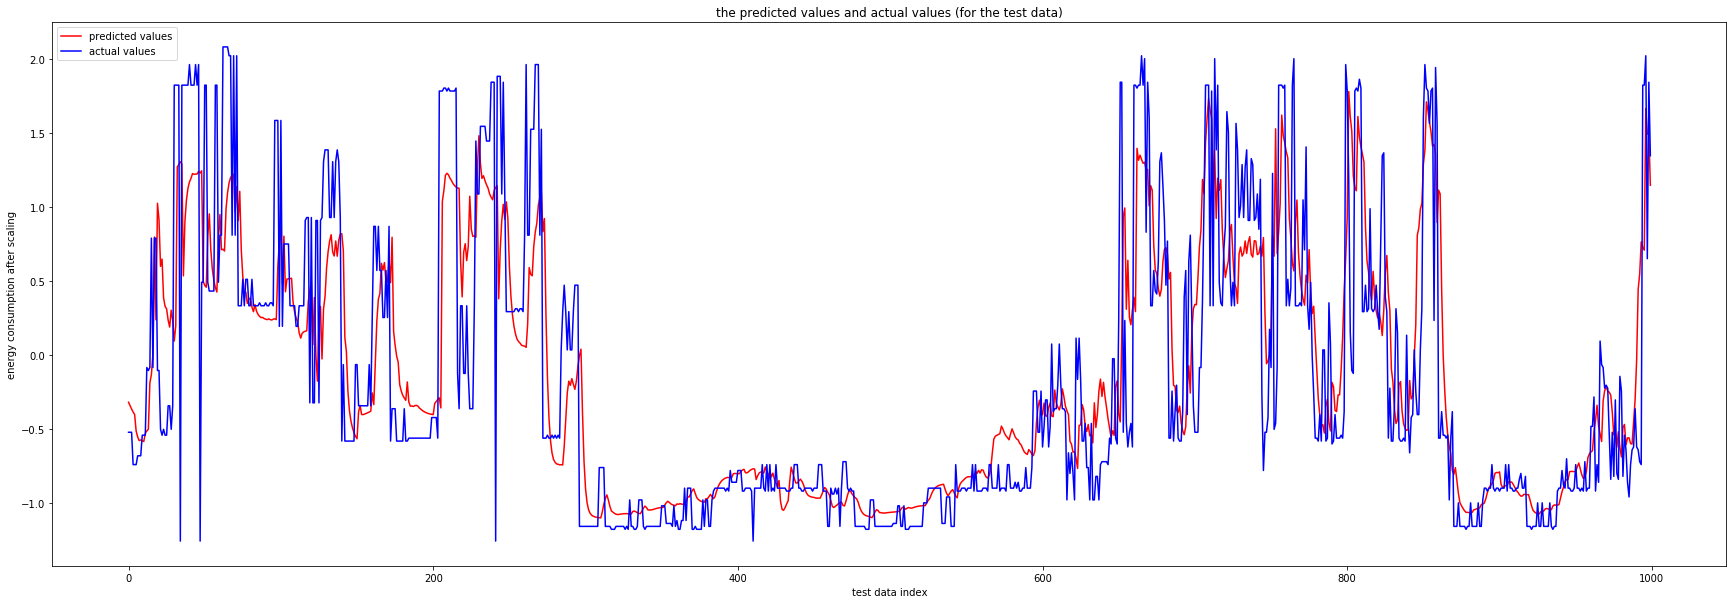

In [0]:
# plot the predicted values and actual values (for the test data)
fig, axs = plt.subplots(figsize=(30,10))

axs.plot(p,color='red', label='predicted values')
axs.plot(y_test,color='blue', label='actual values')
axs.set_title('the predicted values and actual values (for the test data)')

plt.xlabel('test data index')
plt.ylabel('energy consumption after scaling')
plt.legend(loc='upper left')
plt.show()

In [0]:
# An estimation of anomly population of the dataset
outliers_fraction = 0.01
# select the most distant prediction/reality data points as anomalies
diff = pd.Series(diff)

number_of_outliers = int(outliers_fraction*len(diff))

threshold = diff.nlargest(number_of_outliers).min()

print("number_of_outliers = {0}, threshold = {1} ".format(number_of_outliers,threshold))

number_of_outliers = 10, threshold = 1.7202907964199765 


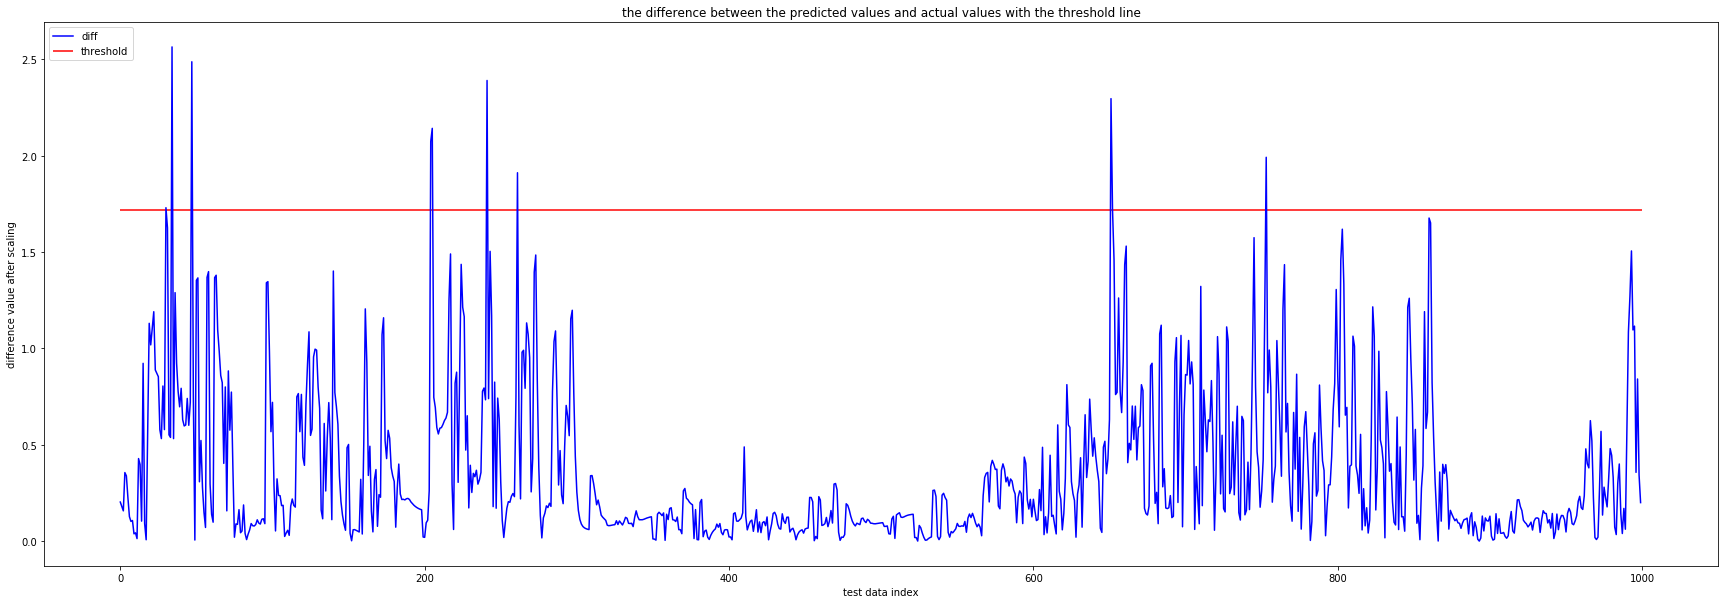

In [0]:
# plot the difference and the threshold (for the test data)
fig, axs = plt.subplots(figsize=(30,10))

axs.plot(diff,color='blue', label='diff')
#axs.plot(p,color='black', label='predicted values')
#axs.plot(y_test,color='green', label='actual values')
axs.set_title('the difference between the predicted values and actual values with the threshold line')

plt.hlines(threshold, 0, 1000, color='red', label='threshold')
plt.xlabel('test data index')
plt.ylabel('difference value after scaling')
plt.legend(loc='upper left')
plt.show()

In [0]:
# data with anomaly label (test data part)
test = (diff >= threshold).astype(int)
# the training data part where we didn't predict anything (overfitting possible): no anomaly
complement = pd.Series(0, index=np.arange(len(data_n)-testdatasize))
last_train_data= (df['datetime'].tolist())[-testdatasize]
# add the data to the main
df_with_anomaly = df
df_with_anomaly['anomaly'] = complement.append(test, ignore_index='True')

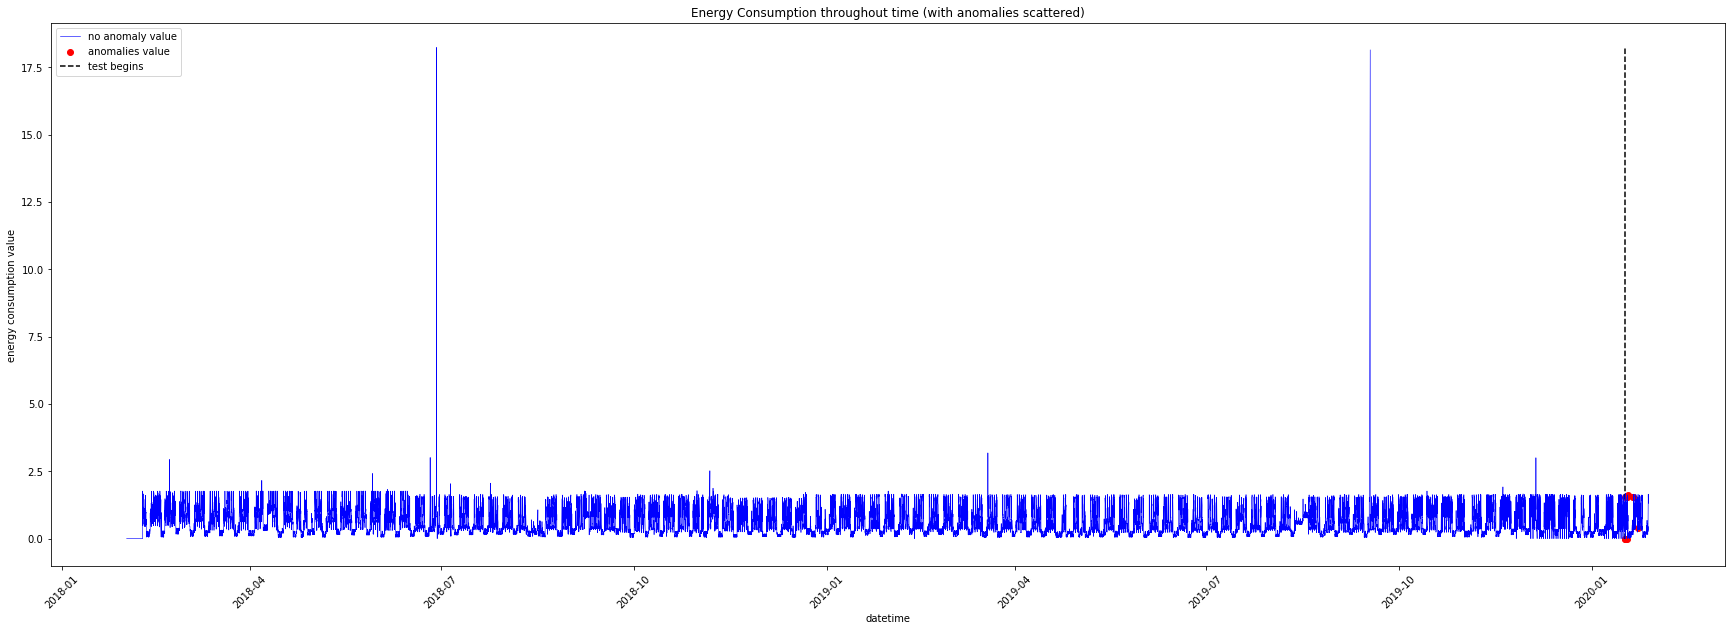

In [0]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize=(30, 10))

a = df_with_anomaly.loc[df_with_anomaly['anomaly'] == 1, ['datetime', 'ModuleConsumedWatt']] #anomaly
ax.plot(df_with_anomaly['datetime'], df_with_anomaly['ModuleConsumedWatt'], color='blue', label='no anomaly value', linewidth=0.6)
ax.scatter(a['datetime'].tolist(),a['ModuleConsumedWatt'], color='red', label='anomalies value')
ax.set_title('Energy Consumption throughout time (with anomalies scattered)')

max_value = df_with_anomaly['ModuleConsumedWatt'].max()
min_value = df_with_anomaly['ModuleConsumedWatt'].min()
plt.vlines(last_train_data, min_value, max_value, color='black', linestyles = "dashed", label='test begins')
plt.xlabel('datetime')
plt.xticks(rotation=45)
plt.ylabel('energy consumption value')
plt.legend(loc='upper left')
plt.show()

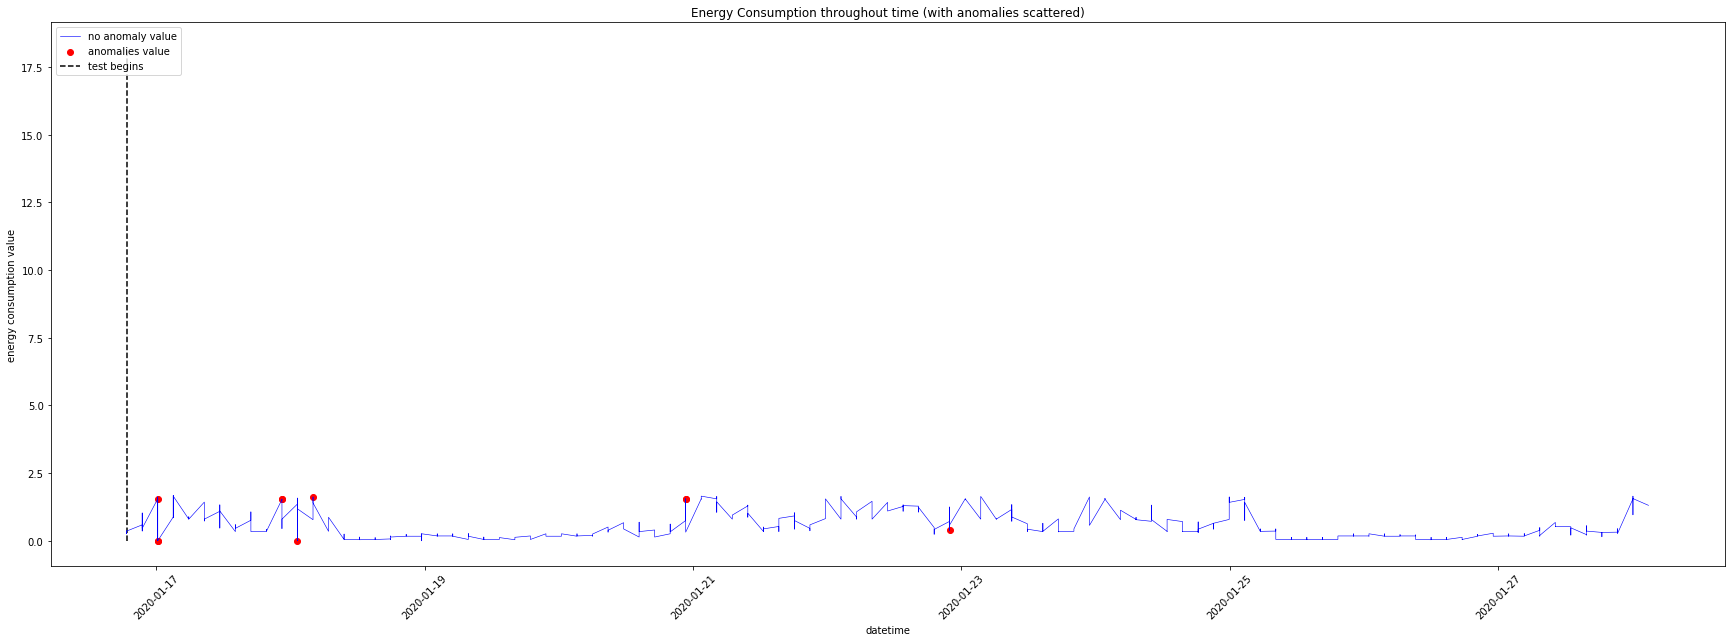

In [0]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize=(30, 10))

a = df_with_anomaly.tail(1000).loc[df_with_anomaly.tail(1000)['anomaly'] == 1, ['datetime', 'ModuleConsumedWatt']] #anomaly
ax.plot(df_with_anomaly.tail(1000)['datetime'], df_with_anomaly.tail(1000)['ModuleConsumedWatt'], color='blue', label='no anomaly value', linewidth=0.6)
ax.scatter(a['datetime'].tolist(),a['ModuleConsumedWatt'], color='red', label='anomalies value')
ax.set_title('Energy Consumption throughout time (with anomalies scattered)')

max_value = df_with_anomaly['ModuleConsumedWatt'].max()
min_value = df_with_anomaly['ModuleConsumedWatt'].min()
plt.vlines(last_train_data, min_value, max_value, color='black', linestyles = "dashed", label='test begins')
plt.xlabel('datetime')
plt.xticks(rotation=45)
plt.ylabel('energy consumption value')
plt.legend(loc='upper left')
plt.show()